# ***Pokémon Data Set Analysis***

<img src="https://1000marcas.net/wp-content/uploads/2020/01/Logo-Pokemon.png" width="600">

Description of the columns:

- ***#***: ID for each pokemon
- ***Name***: Name of each pokemon
- ***Type 1***: Each pokemon has a type, this determines weakness/resistance to attacks
- ***Type 2***: Some pokemon are dual type and have 2
- ***Total***: sum of all stats that come after this, a general guide to how strong a pokemon is
- ***HP***: hit points, or health, defines how much damage a pokemon can withstand before fainting
- ***Attack***: the base modifier for normal attacks (eg. Scratch, Punch)
- ***Defense***: the base damage resistance against normal attacks
- ***SP Atk***: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)
- ***SP Def***: the base damage resistance against special attacks
- ***Speed***: determines which pokemon attacks first each round

___________

In [1]:
# Import the libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines
from matplotlib.transforms import Bbox, TransformedBbox
from matplotlib.legend_handler import HandlerBase
from matplotlib.image import BboxImage
import seaborn as sns
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from statsmodels.distributions.empirical_distribution import ECDF

plt.style.use('ggplot')

In [2]:
if os.path.exists('plots') != True:
    os.mkdir('plots')

In [3]:
# Load the data
df = pd.read_csv('pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
# Check info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [5]:
# Define the color code for each Pokémon type
color_types = {
	'normal': '#A8A77A',
	'fire': '#EE8130',
	'water': '#6390F0',
	'electric': '#F7D02C',
	'grass': '#7AC74C',
	'ice': '#96D9D6',
	'fighting': '#C22E28',
	'poison': '#A33EA1',
	'ground': '#E2BF65',
	'flying': '#A98FF3',
	'psychic': '#F95587',
	'bug': '#A6B91A',
	'rock': '#B6A136',
	'ghost': '#735797',
	'dragon': '#6F35FC',
	'dark': '#705746',
	'steel': '#B7B7CE',
	'fairy': '#D685AD'
}

In [6]:
# Define a list with the names of the stats
stats = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Total']

## 1 - Overview

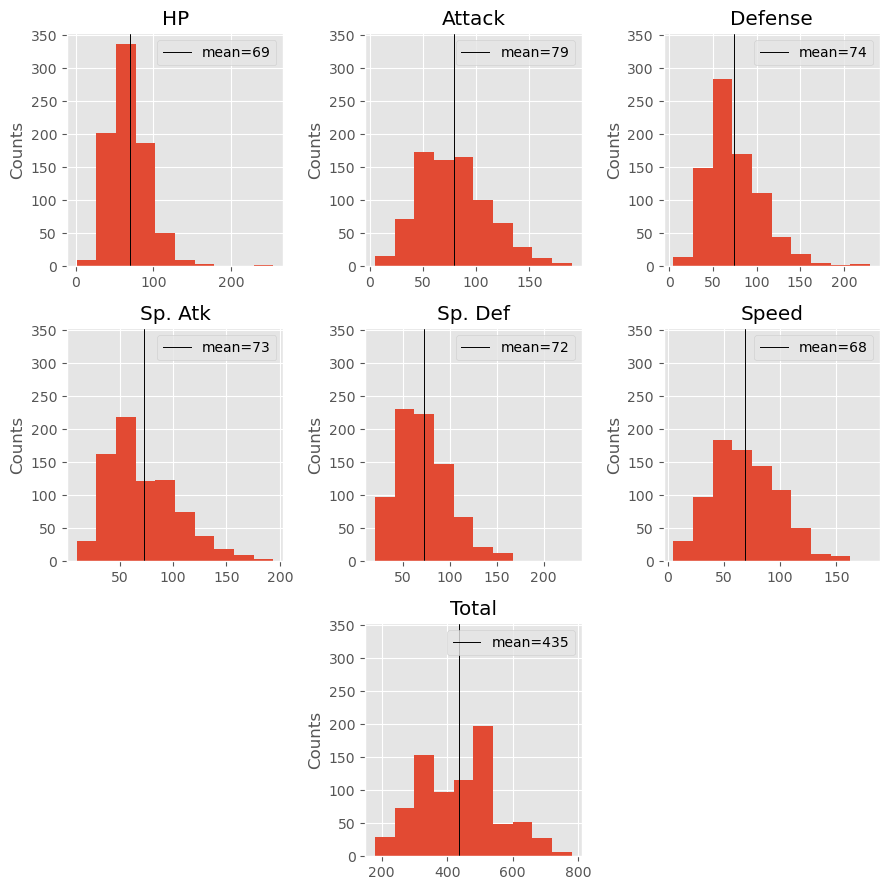

In [7]:
# Let's plot histograms of the different stats
fig = plt.figure(figsize=(9, 9))
sharey_ax = None
for i, stat in enumerate(stats):
    if stat != 'Total':
        ax = fig.add_subplot(3, 3, i+1, sharey=sharey_ax)
        ax.hist(df[stat])
        ax.axvline(df[stat].mean(), color='k', lw=.7, label='mean={:.0f}'.format(df[stat].mean()))
        ax.legend()
        ax.set_ylabel('Counts')
        ax.set_title(stat)
        if sharey_ax is None:
            sharey_ax = ax
    else:
        ax = fig.add_subplot(3, 3, i+2, sharey=sharey_ax)
        ax.hist(df[stat])
        ax.axvline(df[stat].mean(), color='k', lw=.7, label='mean={:.0f}'.format(df[stat].mean()))
        ax.legend()
        ax.set_ylabel('Counts')
        ax.set_title(stat)
fig.tight_layout()
fig.savefig('plots/hist_stats.png', dpi=300, bbox_inches='tight')


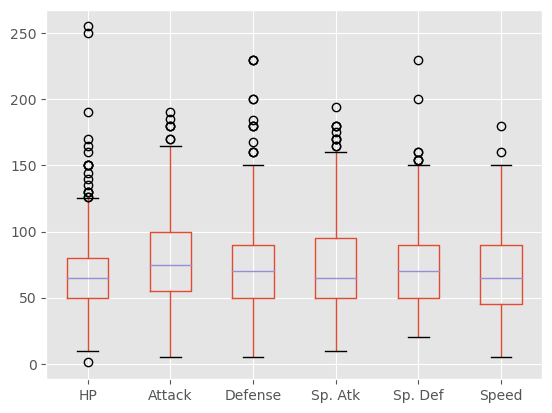

In [8]:
# Boxplot
df[stats[:-1]].boxplot()
plt.savefig('plots/boxplot_stats.png', dpi=300, bbox_inches='tight')

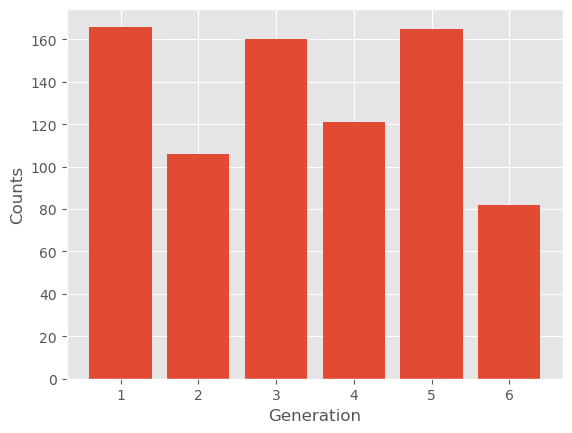

In [9]:
# Nº of Pokémons in each generation
fig, ax = plt.subplots()
ax.bar(df['Generation'].value_counts().index,
       df['Generation'].value_counts().values)
ax.set_xlabel('Generation'), ax.set_ylabel('Counts');

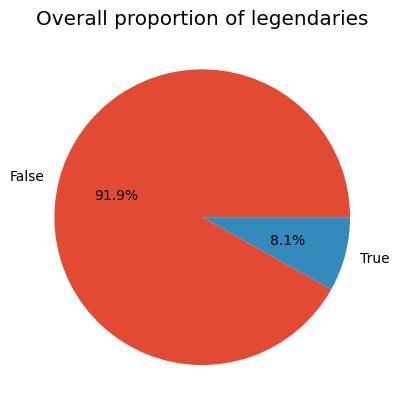

In [10]:
# Overall proportion of legendary Pokémons
fig, ax = plt.subplots()
ax.pie(df['Legendary'].value_counts().values/df.shape[0]*100,
       labels=df['Legendary'].value_counts().index,
       autopct='%1.1f%%')
ax.set_title('Overall proportion of legendaries');

In [11]:
# Same as above but for each generation
df_leg_by_gen = df[['Generation', 'Legendary']].value_counts().sort_values(key=lambda x: x.index.get_level_values('Generation')).unstack().apply(lambda x: x/sum(x)*100, axis=1)
df_leg_by_gen

Legendary,False,True
Generation,,
1,96.385542,3.614458
2,95.283019,4.716981
3,88.750000,11.250000
4,89.256198,10.743802
5,90.909091,9.090909
6,90.243902,9.756098


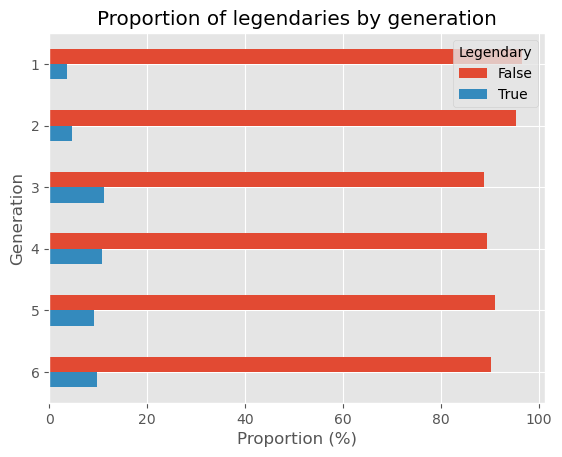

In [12]:
ax = df_leg_by_gen.plot(kind='barh')
ax.invert_yaxis()
ax.set_xlabel('Proportion (%)');
ax.set_title('Proportion of legendaries by generation');

In [13]:
print('Here, we can see how the Generation {} is the one with more proportion of legendary Pokémons with {:.1f}%, whereas Generation {} has the least proportion with {:.1f}%.'.format(df_leg_by_gen.loc[:, True].idxmax(),
                                                                                                                                                                                     df_leg_by_gen.loc[:, True].max(),
                                                                                                                                                                                     df_leg_by_gen.loc[:, True].idxmin(),
                                                                                                                                                                                     df_leg_by_gen.loc[:, True].min()))
print('In absolute terms, this difference means x{:.1f} times.'.format(df_leg_by_gen.loc[:, True].max()/df_leg_by_gen.loc[:, True].min()))

Here, we can see how the Generation 3 is the one with more proportion of legendary Pokémons with 11.2%, whereas Generation 1 has the least proportion with 3.6%.
In absolute terms, this difference means x3.1 times.


## 2 - Analysis by Type

In [14]:
# Merge Type 1 and Type 2 into a single category
df['Type'] = df[['Type 1', 'Type 2']].apply(lambda x: x[0] if type(x[1]) == float else x[0] + '-' + x[1], axis=1)
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Grass-Poison
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Grass-Poison
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Grass-Poison
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,Grass-Poison
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,Fire


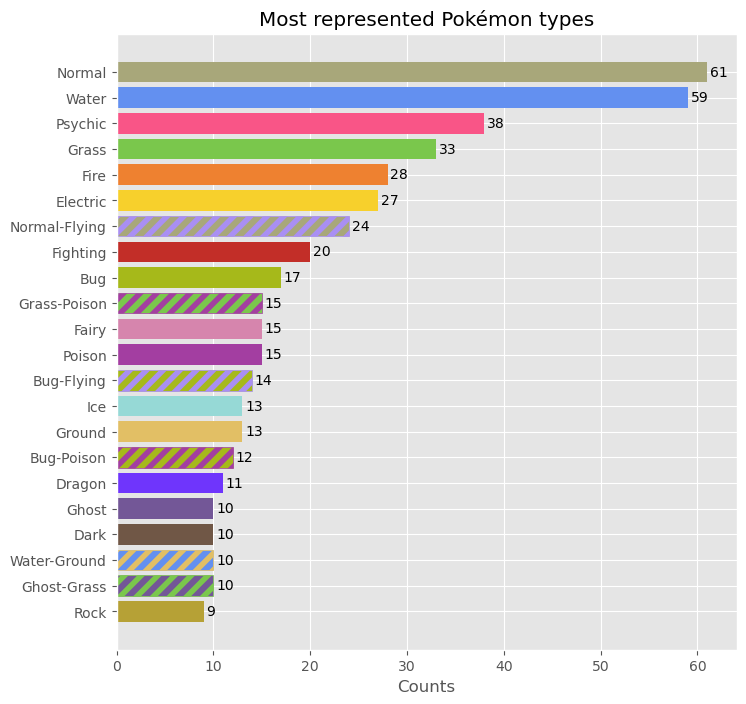

In [15]:
# Find the most common types
most_common_types = df['Type'].value_counts()[df['Type'].value_counts()>8] # Get only those categories with more than 8 pokemons since there are more than 150 unique values

plt.rcParams['hatch.linewidth'] = 4
fig, ax = plt.subplots(figsize=(8, 8))
for idx, values in most_common_types.items():
    if '-' in idx:
        bar = ax.barh(idx,
                      values,
                      color=color_types[idx.split('-')[0].lower()],
                      edgecolor=color_types[idx.split('-')[1].lower()],
                      hatch='//')
        ax.bar_label(bar, padding=2)
    else:
        bar = ax.barh(idx,
                      values,
                      color=color_types[idx.lower()])
        ax.bar_label(bar, padding=2)
ax.set_xlabel('Counts')
ax.invert_yaxis()
ax.set_title('Most represented Pokémon types');
fig.savefig('plots/barplot_types.png', dpi=300, bbox_inches='tight')

In [16]:
# Find the best ones (in "Total" terms) for each Type
df_total_by_types = df.loc[df.groupby('Type')['Total'].idxmax()[most_common_types.index], :]
df_total_by_types

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type
552,493,Arceus,Normal,NaN,720,120,120,120,120,120,120,4,True,Normal
422,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True,Water
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True,Psychic
550,492,ShayminLand Forme,Grass,NaN,600,100,100,100,100,100,100,4,True,Grass
263,244,Entei,Fire,NaN,580,115,115,85,90,75,100,2,True,Fire
262,243,Raikou,Electric,NaN,580,90,85,75,115,100,115,2,True,Electric
23,18,PidgeotMega Pidgeot,Normal,Flying,579,83,80,80,135,80,121,1,False,Normal-Flying
681,620,Mienshao,Fighting,NaN,510,65,125,60,95,60,105,5,False,Fighting
136,127,Pinsir,Bug,NaN,500,65,125,100,55,70,85,1,False,Bug
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,Grass-Poison


In [17]:
# The best Pokémon among all types
df_total_by_types.loc[df_total_by_types['Total'].idxmax(), :]

#                             150
Name          MewtwoMega Mewtwo Y
Type 1                    Psychic
Type 2                        NaN
Total                         780
HP                            106
Attack                        150
Defense                        70
Sp. Atk                       194
Sp. Def                       120
Speed                         140
Generation                      1
Legendary                    True
Type                      Psychic
Name: 164, dtype: object

<img src="https://img.pokemondb.net/artwork/large/mewtwo-mega-y.jpg" width="200">

In [18]:
# The least best Pokémon among all types
df_total_by_types.loc[df_total_by_types['Total'].idxmin(), :]

#                               711
Name          GourgeistAverage Size
Type 1                        Ghost
Type 2                        Grass
Total                           494
HP                               65
Attack                           90
Defense                         122
Sp. Atk                          58
Sp. Def                          75
Speed                            84
Generation                        6
Legendary                     False
Type                    Ghost-Grass
Name: 784, dtype: object

<img src="https://img.pokemondb.net/artwork/large/gourgeist.jpg" width="200">

In [19]:
# Are pokemon that have two types stronger on average?
print('Stats of single-type Pokémon:')
print(df[df['Type 2'].isna()]['Total'].describe())
print('\nStats of two-type Pokémon:')
print(df[df['Type 2'].notna()]['Total'].describe())

Stats of single-type Pokémon:
count    386.000000
mean     412.015544
std      114.746993
min      180.000000
25%      313.250000
50%      410.000000
75%      495.000000
max      780.000000
Name: Total, dtype: float64

Stats of two-type Pokémon:
count    414.000000
mean     456.628019
std      120.849502
min      190.000000
25%      355.000000
50%      475.000000
75%      529.500000
max      780.000000
Name: Total, dtype: float64


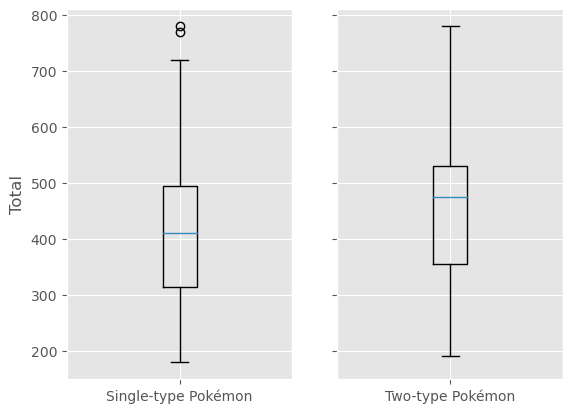

In [20]:
fig, ax = plt.subplots(1, 2, sharey=True)
ax[0].boxplot(df[df['Type 2'].isna()]['Total'])
ax[0].set_xticklabels(['Single-type Pokémon']), ax[0].set_ylabel('Total')
ax[1].boxplot(df[df['Type 2'].notna()]['Total'])
ax[1].set_xticklabels(['Two-type Pokémon']);

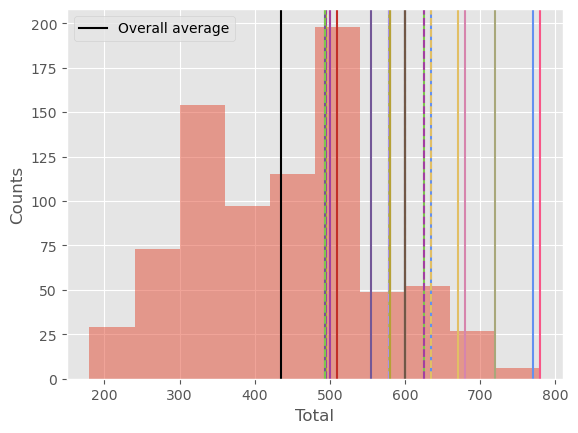

In [21]:
# Let's add some perspective
fig, ax = plt.subplots()
ax.hist(df['Total'], alpha=.5)
for ptype in most_common_types.index:
        if '-' in ptype:
                ax.axvline(df_total_by_types[df_total_by_types['Type'] == ptype]['Total'].values,
                           linestyle='-',
                           color=color_types[ptype.split('-')[0].lower()])
                ax.axvline(df_total_by_types[df_total_by_types['Type'] == ptype]['Total'].values,
                           linestyle='--',
                           color=color_types[ptype.split('-')[1].lower()])
        else:
                ax.axvline(df_total_by_types[df_total_by_types['Type'] == ptype]['Total'].values,
                           linestyle='-',
                           color=color_types[ptype.lower()])
ax.axvline(df['Total'].mean(), color='k', label='Overall average')
ax.legend()
ax.set_xlabel('Total'), ax.set_ylabel('Counts');

## 3 - Analysis by Stats

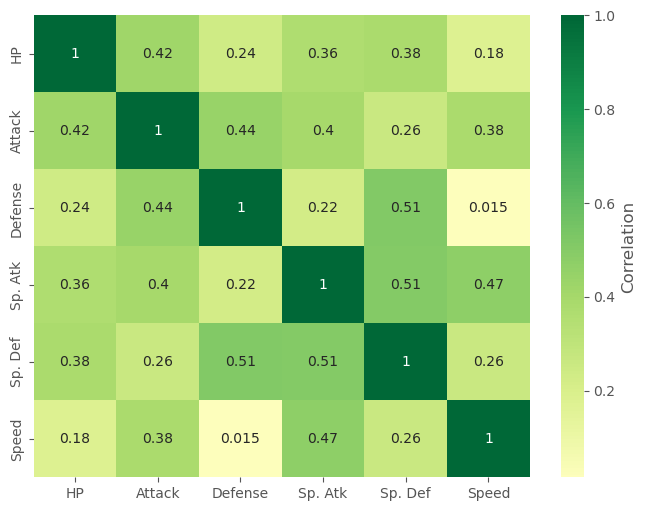

In [22]:
# Correlation matrix between stats
plt.figure(figsize=(8, 6))
sns.heatmap(df[stats[:-1]].corr(),
            xticklabels=df[stats[:-1]].corr().columns,
            yticklabels=df[stats[:-1]].corr().columns,
            cmap='RdYlGn', center=0, annot=True,
            cbar_kws={'label': 'Correlation'});

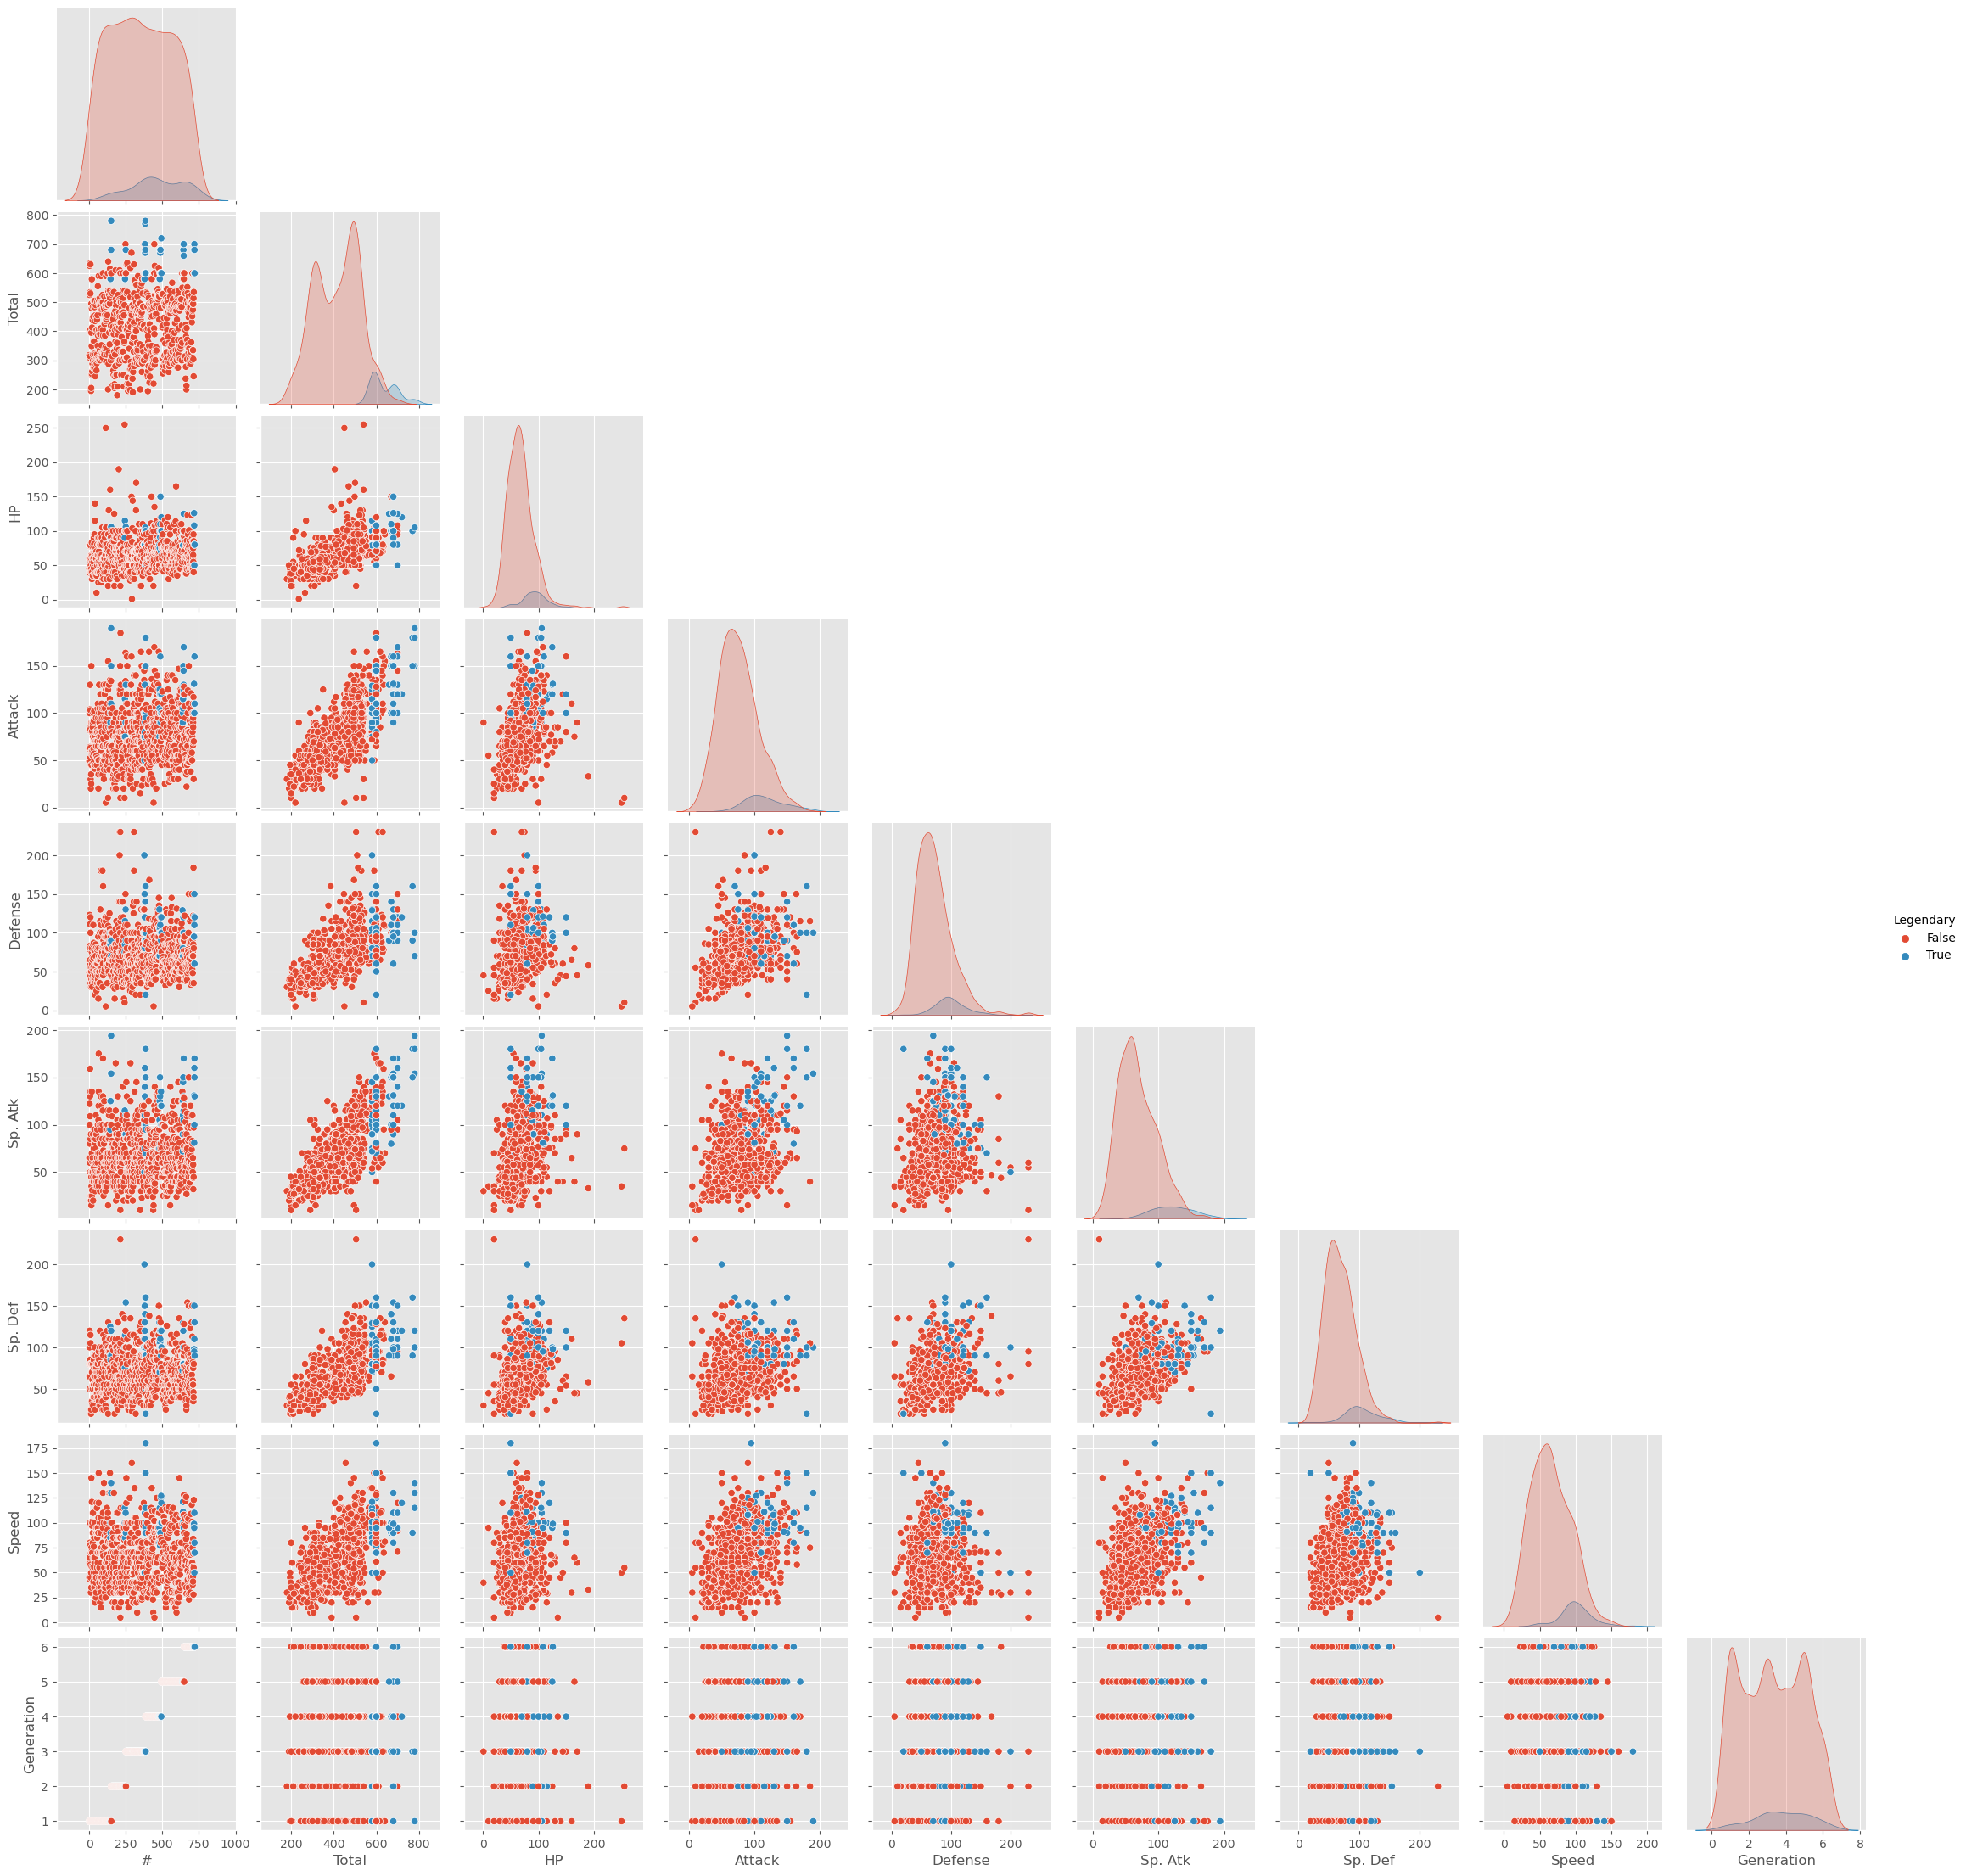

In [23]:
# Scatter plots (pairplot from seaborn)
df_pairplot = df.copy()
df_pairplot = df_pairplot[stats+['Legendary']]
df_pairplot['Legendary'].astype(int)
sns.pairplot(df, hue='Legendary', corner = True)

In [24]:
# The best Pokémon(s) in each stat
for stat in stats:
    print(stat, ':', df[df[stat]==df[stat].max()]['Name'].values)

HP : ['Blissey']
Attack : ['MewtwoMega Mewtwo X']
Defense : ['SteelixMega Steelix' 'Shuckle' 'AggronMega Aggron']
Sp. Atk : ['MewtwoMega Mewtwo Y']
Sp. Def : ['Shuckle']
Speed : ['DeoxysSpeed Forme']
Total : ['MewtwoMega Mewtwo X' 'MewtwoMega Mewtwo Y' 'RayquazaMega Rayquaza']


In [25]:
# Let's find out which Pokémon is more unbalanced among their stats
df_scaled = df.copy()

# To do that, first, we have to normalize each stat
for stat in stats:
    df_scaled[stat] = df_scaled[stat]/df[stat].max() #Scale the stat dividing by max value
# Correct the Total field since it is made by a sum of of the stats and we have normalized it above
df_scaled['Total'] = df_scaled[stats[:-1]].apply(lambda x: sum(x), axis=1)
# Add a column with a metric that measures dispersion
df_scaled['Coeff of Variation'] = df_scaled[stats[:-1]].apply(lambda x: (x.std()/x.mean()), axis=1)
df_scaled.sort_values('Coeff of Variation')

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type,Coeff of Variation
544,487,GiratinaAltered Forme,Ghost,Dragon,3.173493,0.588235,0.526316,0.521739,0.515464,0.521739,0.500000,4,True,Ghost-Dragon,0.057630
94,87,Dewgong,Water,Ice,2.231945,0.352941,0.368421,0.347826,0.360825,0.413043,0.388889,1,False,Water-Ice,0.066450
346,317,Swalot,Poison,NaN,2.179951,0.392157,0.384211,0.360870,0.376289,0.360870,0.305556,3,False,Poison,0.085144
345,316,Gulpin,Poison,NaN,1.405567,0.274510,0.226316,0.230435,0.221649,0.230435,0.222222,3,False,Poison,0.085723
754,684,Swirlix,Fairy,NaN,1.606897,0.243137,0.252632,0.286957,0.304124,0.247826,0.272222,6,False,Fairy,0.090592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,440,Happiny,Normal,NaN,0.966807,0.392157,0.026316,0.021739,0.077320,0.282609,0.166667,4,False,Normal,0.932099
381,349,Feebas,Water,NaN,0.979457,0.078431,0.078947,0.086957,0.051546,0.239130,0.444444,3,False,Water,0.938785
139,129,Magikarp,Water,NaN,0.978914,0.078431,0.052632,0.239130,0.077320,0.086957,0.444444,1,False,Water,0.939449
121,113,Chansey,Normal,NaN,1.943159,0.980392,0.026316,0.021739,0.180412,0.456522,0.277778,1,False,Normal,1.114285


In [26]:
# The most unbalanced Pokémon
df.loc[df_scaled['Coeff of Variation'].idxmax(), :]

#                  213
Name           Shuckle
Type 1             Bug
Type 2            Rock
Total              505
HP                  20
Attack              10
Defense            230
Sp. Atk             10
Sp. Def            230
Speed                5
Generation           2
Legendary        False
Type          Bug-Rock
Name: 230, dtype: object

<img src="https://img.pokemondb.net/artwork/large/shuckle.jpg" width="200">

In [27]:
# The most balanced Pokémon
df.loc[df_scaled['Coeff of Variation'].idxmin(), :]

#                               487
Name          GiratinaAltered Forme
Type 1                        Ghost
Type 2                       Dragon
Total                           680
HP                              150
Attack                          100
Defense                         120
Sp. Atk                         100
Sp. Def                         120
Speed                            90
Generation                        4
Legendary                      True
Type                   Ghost-Dragon
Name: 544, dtype: object

<img src="https://img.pokemondb.net/artwork/large/giratina-altered.jpg" width="200">

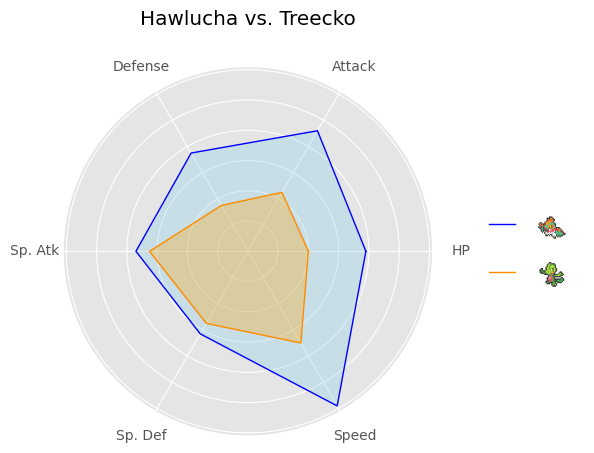

In [28]:
# Create a polar plot to compare the stats between two Pokémon
class HandlerLineImage(HandlerBase):

    def __init__(self, path, space=15, offset = 10):
        self.space=space
        self.offset=offset
        self.image_data = plt.imread(path)        
        super(HandlerLineImage, self).__init__()

    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):

        l = matplotlib.lines.Line2D([xdescent+self.offset,xdescent+(width-self.space)/3.+self.offset],
                                     [ydescent+height/2., ydescent+height/2.])
        l.update_from(orig_handle)
        l.set_clip_on(False)
        l.set_transform(trans)

        bb = Bbox.from_bounds(xdescent +(width+self.space)/3.+self.offset,
                              ydescent,
                              height*self.image_data.shape[1]/self.image_data.shape[0],
                              height)

        tbb = TransformedBbox(bb, trans)
        image = BboxImage(tbb)
        image.set_data(self.image_data)

        self.update_prop(image, orig_handle, legend)
        return [l, image]

rand1, rand2 = np.random.randint(0, df.shape[0]), np.random.randint(0, df.shape[0])
values1 = (df.loc[rand1, stats[:-1]]).to_list()
values2 = (df.loc[rand2, stats[:-1]]).to_list()

# Calculate the angles
angles = np.linspace(0, 2*np.pi, len(stats[:-1]), endpoint=False).tolist()
angles += angles[:1]  # Repeat first angle to close the graph

# Convert values to polar coordinates
values1 += values1[:1]  # Repeat first angle to close the graph
coords1 = np.array(values1)
values2 += values2[:1]  # Repeat first angle to close the graph
coords2 = np.array(values2)

fig, ax = plt.subplots(subplot_kw={'polar': True})
ax.fill(angles, coords1, color='skyblue', alpha=0.3)
p1, = plt.plot(angles, coords1, color='blue', linewidth=1)
ax.fill(angles, coords2, color='orange', alpha=0.3)
p2, = plt.plot(angles, coords2, color='darkorange', linewidth=1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(stats[:-1])
ax.set_yticklabels([])
ax.tick_params(axis='x', pad=10)
ax.set_ylim
ax.legend([p1, p2], ["", ""],
   handler_map={p1: HandlerLineImage("sprites/poke_{}.png".format(df.loc[rand1, '#'])), p2: HandlerLineImage("sprites/poke_{}.png".format(df.loc[rand2, '#']))}, 
   handlelength=2, labelspacing=0.0, fontsize=36, borderpad=0,
   handletextpad=0.2, borderaxespad=0.1, frameon=False,
   loc='center left', bbox_to_anchor=(1.1, 0.5))
ax.set_title('{} vs. {}'.format(df.loc[rand1, 'Name'], df.loc[rand2, 'Name']),
             pad=30)
plt.show()

## 4 - Analysis by Generation

In [29]:
stat='Total'
# Find the best pokemon (in "Total" terms) of each generation
df_totalmax_by_generation = df.loc[df.groupby('Generation')[stat].idxmax(), df.columns]
df_totalmax_by_generation.head(6)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,Psychic-Fighting
268,248,TyranitarMega Tyranitar,Rock,Dark,700,100,164,150,95,120,71,2,False,Rock-Dark
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True,Dragon-Flying
552,493,Arceus,Normal,NaN,720,120,120,120,120,120,120,4,True,Normal
711,646,KyuremBlack Kyurem,Dragon,Ice,700,125,170,100,120,90,95,5,True,Dragon-Ice
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,Rock-Fairy


In [30]:
# Find the worst pokemon (in "Total" terms) of each generation
df_totalmin_by_generation = df.loc[df.groupby('Generation')[stat].idxmin(), df.columns]
df_totalmin_by_generation.head(6)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type
13,10,Caterpie,Bug,NaN,195,45,30,35,20,20,45,1,False,Bug
206,191,Sunkern,Grass,NaN,180,30,30,30,30,30,30,2,False,Grass
322,298,Azurill,Normal,Fairy,190,50,20,40,20,40,20,3,False,Normal-Fairy
446,401,Kricketot,Bug,NaN,194,37,25,41,25,41,25,4,False,Bug
563,504,Patrat,Normal,NaN,255,45,55,39,35,39,42,5,False,Normal
732,664,Scatterbug,Bug,NaN,200,38,35,40,27,25,35,6,False,Bug


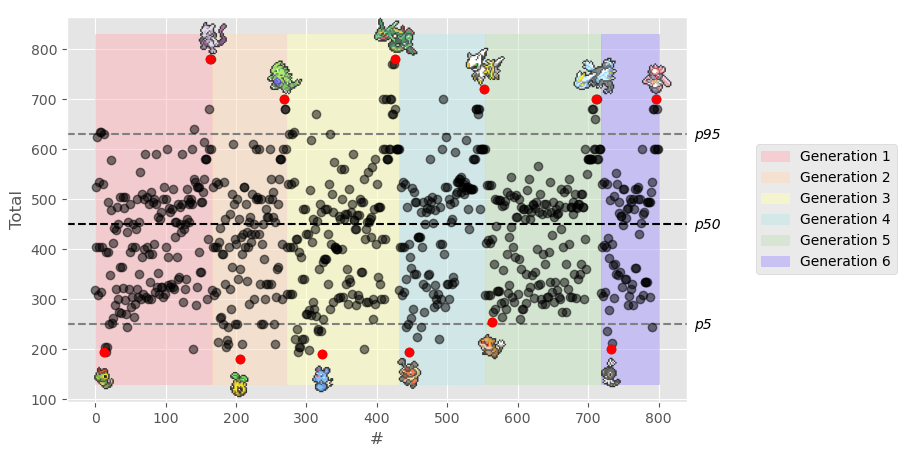

In [31]:
def getImage(path, zoom=1):
    return OffsetImage(plt.imread(path), zoom=zoom)

colors = ['#FFB3BA', '#FFDAB9', '#FFFFB5', '#BEE7E9', '#C3E4BD', '#A79AFF']
first_idx_generation = df.groupby('Generation').apply(lambda x: x.index[0]).values
first_idx_generation = np.append(first_idx_generation, len(df))

fig, ax = plt.subplots(figsize=(8, 5))

ax.axhline(df[stat].median(), linestyle='--', color='k')
ax.axhline(df[stat].quantile(.95), linestyle='--', color='gray')
ax.axhline(df[stat].quantile(.05), linestyle='--', color='gray')
plt.text(850, df[stat].median(), 'p50', horizontalalignment='left', verticalalignment='center', fontstyle='italic')
plt.text(850, df[stat].quantile(.95), 'p95', horizontalalignment='left', verticalalignment='center', fontstyle='italic')
plt.text(850, df[stat].quantile(.05), 'p5', horizontalalignment='left', verticalalignment='center', fontstyle='italic')

for i in range(len(first_idx_generation)-1):
     ax.add_patch(plt.Rectangle((first_idx_generation[i], min(df[stat])-50), (first_idx_generation[i+1]-first_idx_generation[i]), 700, color=colors[i], alpha=0.5, label='Generation {}'.format(i+1)))

ax.plot(df.index,
        df[stat], 'o', color='black', alpha=.5)
ax.plot(df_totalmax_by_generation.index,
        df_totalmax_by_generation[stat],
        'o', color='r', markersize=6)
ax.plot(df_totalmin_by_generation.index,
        df_totalmin_by_generation[stat],
        'o', color='r', markersize=6)

for idx, num, s in zip(df_totalmin_by_generation.index, df_totalmin_by_generation['#'], df_totalmin_by_generation[stat]):
     ab = AnnotationBbox(getImage("sprites/poke_{}.png".format(num)), (idx, s-(0.05*max(df[stat]))), frameon=False)
     ax.add_artist(ab)

for idx, num, s in zip(df_totalmax_by_generation.index, df_totalmax_by_generation['#'], df_totalmax_by_generation[stat]):
     ab = AnnotationBbox(getImage("sprites/poke_{}.png".format(num)), (idx, s+(0.06*max(df[stat]))), frameon=False)
     ax.add_artist(ab)

ax.set_ylabel(stat), ax.set_xlabel('#')
ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.savefig('plots/scatter_total_#.png', bbox_inches='tight', dpi=600);

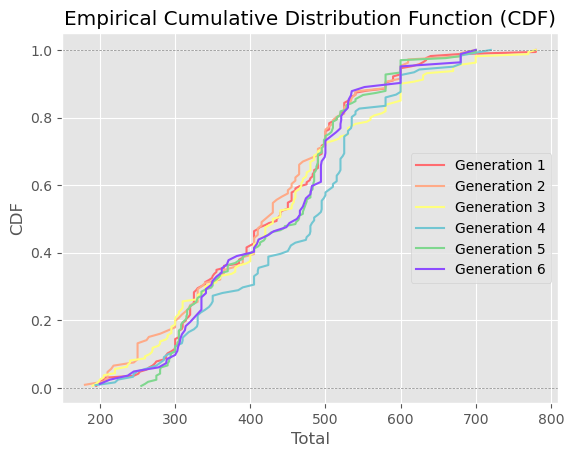

In [32]:
# Let's compute the Total ECDF of each generation to compare the distribution
colors = ['#FF6C70', '#FFAA87', '#FFFF7D', '#72C6D2', '#7FD78E', '#8D4CFF']

for i in df['Generation'].unique(): 
    ecdf = ECDF(np.array(df[df['Generation']==i]['Total']))
    plt.plot(ecdf.x, ecdf.y,
             color=colors[i-1],
             label='Generation {}'.format(i))
plt.axhline(0, linestyle='--', linewidth=0.5, color='gray'), plt.axhline(1, linestyle='--', linewidth=0.5, color='gray')
plt.xlabel('Total'), plt.ylabel('CDF')
plt.legend()
plt.title('Empirical Cumulative Distribution Function (CDF)');
plt.savefig('plots/ECDF_total_gen.png', dpi=300, bbox_inches='tight')